<a href="https://colab.research.google.com/github/alexandremourajr/alexandremourajr/blob/main/Projeto_Analisando_os_Dados_do_Airbnb_Nova_York.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<center><img src="https://images.unsplash.com/photo-1483653364400-eedcfb9f1f88?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=1470&q=80"></center>

###**Análise dos Dados do Airbnb - Nova York**
---
Uma das maiores empresas da atualidade no ramo de hotelaria, surpreendentemente, não possui nenhum hotel. Estamos falando do [Airbnb] (https://www.airbnb.com.br/) empresa que junta a vontade das pessoas de viajar e se hospedar, com moradores das cidades destino que querem alugar seus imóveis de maneira prática pra tirar um dinheirinho a mais. A empresa oferece uma plataforma inovadora que fez com que mais de 300 milhões de pessoas ao redor do mundo desfrutassem dos seus serviços, revolucionando assim o ramo hoteleiro e quebrando seus paradigmas.

Um das iniciativas do Airbnb é disponibilizar dados das principais cidades do mundo no portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), onde é possivel baixar uma grande quantidade de dados e desenvolver diversos projetos e soluções de Data Science.

Se aproveitando disso, surgiu a ideia de analisar dados de uma das cidades mais importantes dos EUA, um dos símbolos do "American Dream", conhecida também como "capital do mundo" cheia de atrações fantásticas e convidativas ao turismo (estátua da liberdade, Broadway, Central Park).

Podemos assim definir assim *Nova York*, objeto da nossa análise. Mas qual será o preço médio de uma noite em um Airbnb na cidade que nunca dorme? Qual seria a região mais cara?


<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

É isso que buscou-se analisar e responder no notebook apresentado abaixo:


*by [Alexandre Moura](https://www.linkedin.com/in/alemourajr/)* - *Projeto do curso - Data Science na Prática 3.0*






## Obtenção dos Dados


In [1]:
# importando os pacotes necessários
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium

%matplotlib inline

In [2]:
# importando o arquivo listings.csv para um DataFrame
DATA_PATH = "http://data.insideairbnb.com/united-states/ny/new-york-city/2022-09-07/visualisations/listings.csv"
df = pd.read_csv(DATA_PATH, index_col = 0)


## Análise dos Dados


**Dicionário das variáveis**

* *name* - Nome da propriedade anunciada
* *host_id* - Número de id do proprietário (anfitrião) da propriedade
* *host_name* - Nome do anfitrião
* *neighbourhood_group* - Identificação do grupo de bairros que o imóvel se localiza
* *neighbourhood* - Bairro onde o imóvel se localiza
* *latitude* - Latitude onde se encontra o imóvel
* *longitude* - Longitude onde se encontra o imóvel
* *room_type* - Tipo do imóvel que esta sendo alugada
* *price* - Preço para alugar o imóvel
* *minimum_nights* - Minimo de noites que é possivel alocar o imóvel
* *calculated_host_listings_count* - Quantidade de imóveis do mesmo anfitrião
* *availability_365* - Número de dias de disponibilidade dentro de 365 dias
* *number_of_review_ltm* - Número de reviews que o imóvel tem nos últimos 12 meses
* *license* - Número da licença do imóvel

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [3]:
# mostrar as 5 primeiras entradas
df.head()

name  host_id            host_name  \
id                                                                        
77765                Superior @ Box House   417504  The Box House Hotel   
2539   Clean & quiet apt home by the park     2787                 John   
45910  Beautiful Queens Brownstone! - 5BR   204539                 Mark   
45935        Room in Beautiful Townhouse.   204586                    L   
45936  Couldn't Be Closer To Columbia Uni   867225                Rahul   

      neighbourhood_group        neighbourhood  latitude  longitude  \
id                                                                    
77765            Brooklyn           Greenpoint  40.73777  -73.95366   
2539             Brooklyn           Kensington  40.64529  -73.97238   
45910              Queens            Ridgewood  40.70309  -73.89963   
45935               Bronx           Mott Haven  40.80635  -73.92201   
45936           Manhattan  Morningside Heights  40.80630  -73.95985   

             room_type  price  minimum_nights  number_of_reviews last_review  \
id                                                                             
77765       Hotel room    308               2                 42  2022-07-18   
2539      Private room    299              30                  9  2018-10-19   
45910  Entire home/apt    425              30                 13  2019-11-12   
45935     Private room     60              30                  0         NaN   
45936     Private room     75              31                135  2022-07-11   

       reviews_per_month  calculated_host_listings_count  availability_365  \
id                                                                           
77765               0.30                              30               217   
2539                0.11                               9               356   
45910               0.10                               6               365   
45935                NaN                               1                83   
45936               0.95                               1               219   

       number_of_reviews_ltm license  
id                                    
77765                      4     NaN  
2539                       0     NaN  
45910                      0     NaN  
45935                      0     NaN  
45936                      4     NaN

### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Vamos prosseguir e identificar a quantidade de entradas que nosso conjunto de dados possui e ver os tipos de cada coluna.

Este *dataset* que baixamos é a versão "resumida" do Airbnb, contém 17 variáveis e 39881 entradas.
Na mesma página que baixamos o arquivo `listings.csv`. Há uma versão mais completa contendo mais de  100 variáveis (`listings.csv.gz`).

In [4]:
# identificar o volume de dados do DataFrame
print(f'Número de entradas:\t{df.shape[0]}')
print(f'Número de variáveis:\t{df.shape[1]}')

# identificando o tipo de dados
df.dtypes


Número de entradas:	39881
Número de variáveis:	17


name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**




In [5]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
print("Porcentagem de valores ausentes em cada variável\n")
(df.isnull().sum()/df.shape[0]).sort_values(ascending=False)*100
#df.isnull().sum()

Porcentagem de valores ausentes em cada variável



license                           99.987463
last_review                       20.967378
reviews_per_month                 20.967378
host_name                          0.125373
name                               0.032597
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
host_id                            0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
neighbourhood                      0.000000
neighbourhood_group                0.000000
calculated_host_listings_count     0.000000
availability_365                   0.000000
number_of_reviews_ltm              0.000000
price                              0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?**
Para identificar a distribuição das variáveis, irei plotar o histograma.

Na nossa análise inicial não precisaremos das colunas abaixo, visto que, nesse primeiro momento elas não nos ajudaram a responder as perguntas propostas. Então excluíremos essas colunas utilizando o método *drop()*.

Vemos também que a quantidade de valores ausentes é infima se comparado ao tamanho do dataset, por esse motivo, podemos excluir essas entradas sem prejudicar a análise.

In [6]:
df_nyc = df.copy()
# excluindo colunas
df_nyc.drop(['license','number_of_reviews','number_of_reviews_ltm','last_review','reviews_per_month'], axis=1, inplace=True)
# verificando a quantidade de valores ausentes nas colunas restantes
print(df_nyc.isnull().sum())
# excluindo linhas NaN
df_nyc.dropna(axis=0, inplace=True)

name                              13
host_id                            0
host_name                         50
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
calculated_host_listings_count     0
availability_365                   0
dtype: int64


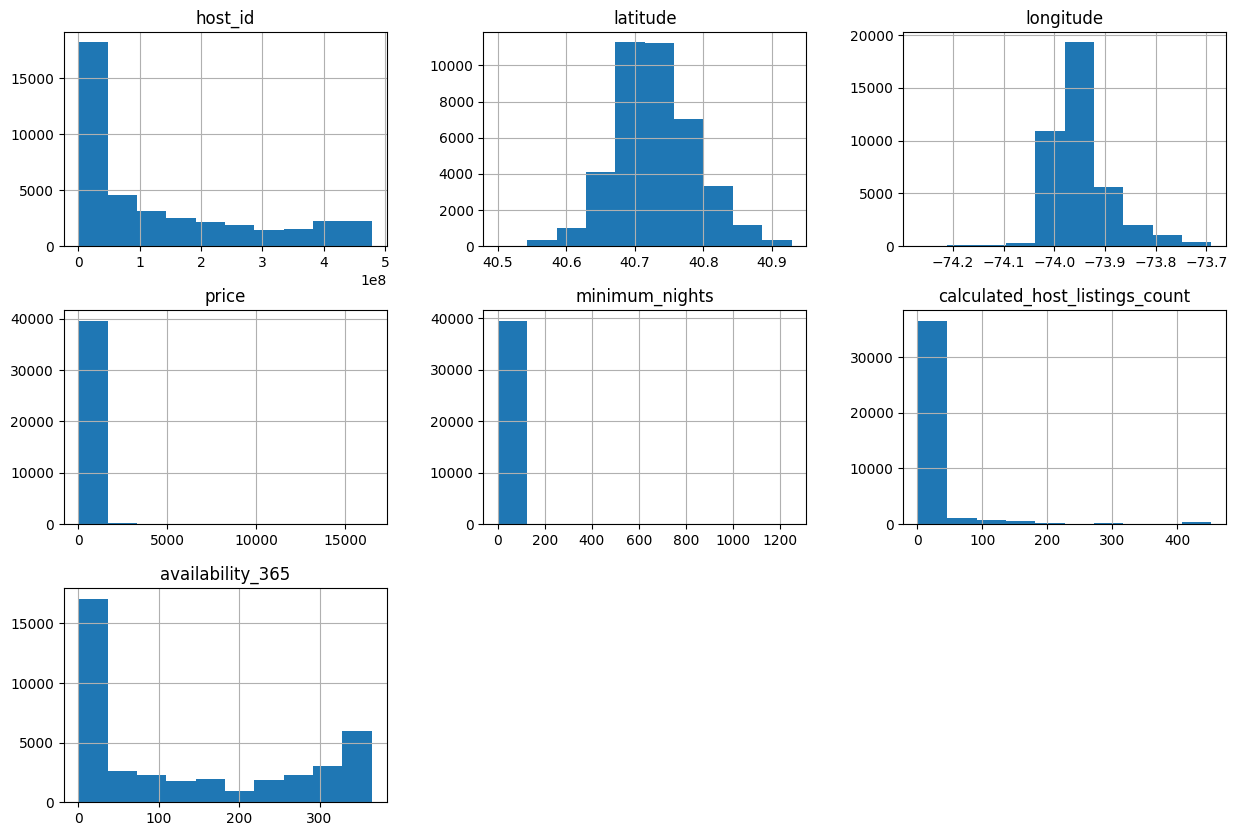

In [7]:
# plotar o histograma das variáveis numéricas
df_nyc.hist(bins=10, figsize=(15,10));

### **Q4. Há *outliers* presentes?**

Pela distribuição do histograma, é possível verificar indícios da presença de outliers. Olhe por exemplo as variáveis price e minimum_nights.

Os valores não seguem uma distribuição, e distorcem toda a representação gráfica. Para confirmar, há duas maneiras rápidas que auxiliam a detecção de outliers. São elas:

*   Resumo estatístico por meio do método describe();
*   Plotar boxplots para a variável;




In [8]:
# resumo estatísticos das variáveis numéricas do dataset
df_nyc[['price','minimum_nights','calculated_host_listings_count','availability_365']].describe()


price  minimum_nights  calculated_host_listings_count  \
count  39818.000000    39818.000000                    39818.000000   
mean     197.219222       19.005475                       16.931865   
std      353.133348       30.798375                       59.642952   
min        0.000000        1.000000                        1.000000   
25%       80.000000        2.000000                        1.000000   
50%      130.000000       14.000000                        1.000000   
75%      218.000000       30.000000                        4.000000   
max    16500.000000     1250.000000                      453.000000   

       availability_365  
count      39818.000000  
mean         131.541740  
std          138.520784  
min            0.000000  
25%            0.000000  
50%           75.000000  
75%          277.000000  
max          365.000000

Olhando o resumo estatístico acima, podemos confirmar algumas hipóteses como:

* A variável price possui 75% do valor abaixo de 218 dólares, porém seu valor máximo é 16500.
* A variável "minimum_nights" apresenta como valor máximo um número que equivaleria a mais de 3 anos de estádia.

#### Boxplot para minimum_nights


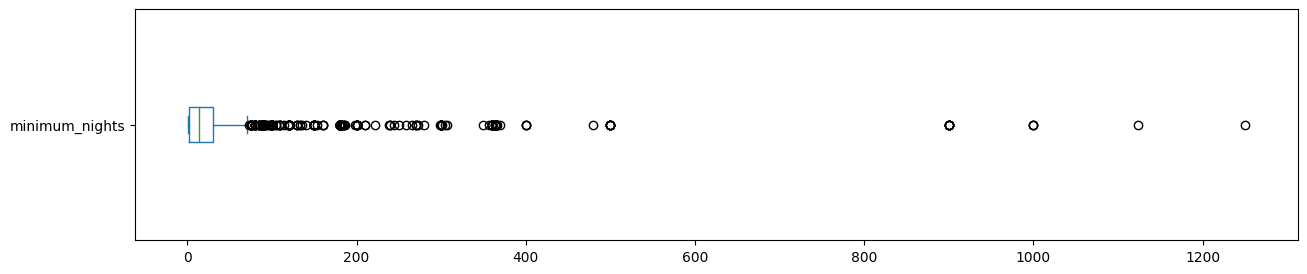

In [9]:
# minimum_nights (mn)
df_nyc.minimum_nights.plot(kind='box', vert=False, figsize=(15,3))
plt.show()


In [10]:
# encontrando outliers - IQR Score
q1_minimum_nights= df_nyc.minimum_nights.quantile(.25)
q3_minimum_nights = df_nyc.minimum_nights.quantile(.75)
iqr_minimum_nights = q3_minimum_nights - q1_minimum_nights
minimum_nights_outlier = q3_minimum_nights + 1.5*iqr_minimum_nights

print("\nO limite superior é de {}".format(minimum_nights_outlier))

# quantidade de valores acima do valor máximo
print("Valores acima de {} dias".format(minimum_nights_outlier))
print('{} entradas'.format(len(df_nyc[df_nyc.minimum_nights > minimum_nights_outlier])))
print("{:.2f}%".format((len(df_nyc[df_nyc.minimum_nights >minimum_nights_outlier]) / df_nyc.shape[0])*100))


O limite superior é de 72.0
Valores acima de 72.0 dias
848 entradas
2.13%


#### Boxplot para price

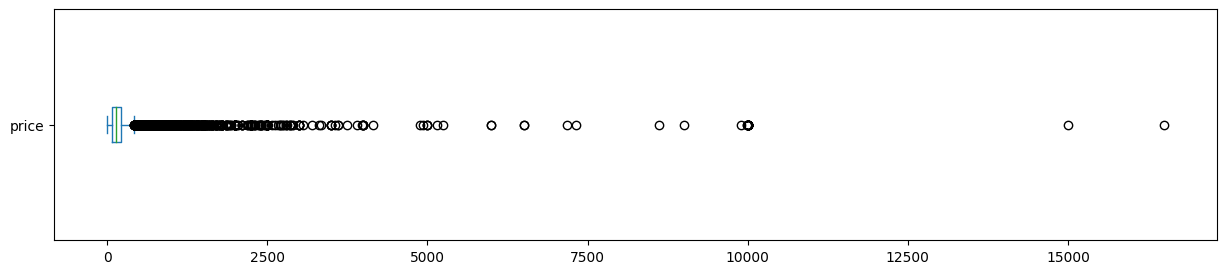

In [11]:
# price
df_nyc.price.plot(kind="box", vert=False, figsize=(15,3))
plt.show()



In [12]:
# encontrando outliers - IQR Score
q1_price = df_nyc.price.quantile(.25)
q3_price = df_nyc.price.quantile(.75)
iqr_price = q3_price - q1_price
price_outlier = q3_price + 1.5*iqr_price

print("\nO limite superior é de {}".format(price_outlier))

# quantidade de valores acima do valor máximo de dias
print("Valores acima de ${}:".format(price_outlier))
print("{} entradas".format(len(df_nyc[df_nyc.price > price_outlier])))
print("{:.2f}%".format((len(df_nyc[df_nyc.price > price_outlier]) / df_nyc.shape[0])*100))



O limite superior é de 425.0
Valores acima de $425.0:
2780 entradas
6.98%


### Histogramas sem *outliers*

Já que identificamos *outliers* nas variáveis `price` e `minimum_nights`, vamos agora limpar o *DataFrame* delas e plotar novamente o histograma.

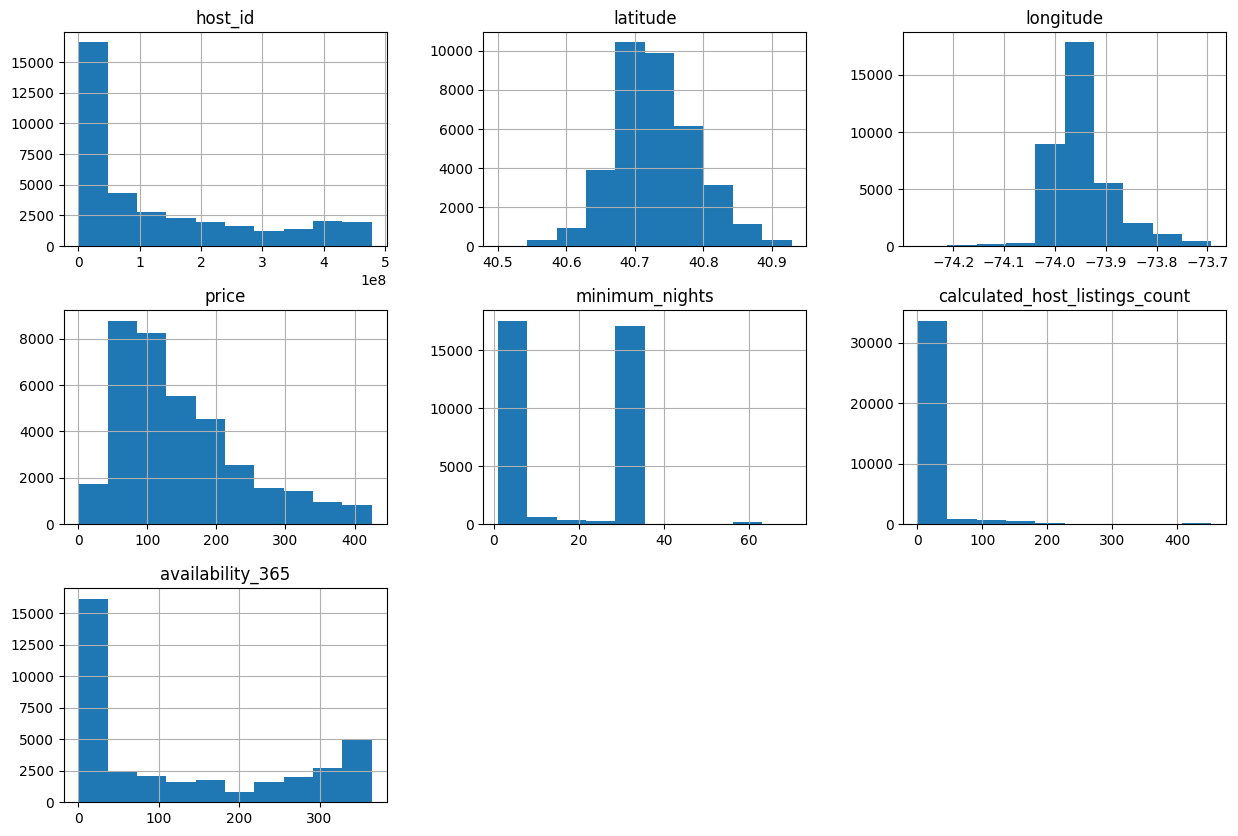

In [13]:
# remover os outliers em um novo dataframe
df_clean = df_nyc.copy()
df_clean.drop(df_clean[df_clean.price > price_outlier].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > minimum_nights_outlier].index, axis=0, inplace=True)

# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=10, figsize=(15,10));

In [14]:
# verificando as dimensões do dataset
print("Dataset sem Outliers")
print("Número de Entradas:\t{}".format(df_clean.shape[0]))
print("Número de Variáveis:\t{}".format(df_clean.shape[1]))

print("\nDataset Original")
print("Número de Entradas:\t{}".format(df.shape[0]))
print("Número de Variáveis:\t{}".format(df.shape[1]))

print("A porcentagem do dataset que foi retirada foi de: {:.2f}%".format(100 - (df_clean.shape[0]*100)/(df.shape[0])))

Dataset sem Outliers
Número de Entradas:	36223
Número de Variáveis:	12

Dataset Original
Número de Entradas:	39881
Número de Variáveis:	17
A porcentagem do dataset que foi retirada foi de: 9.17%


In [15]:
df_clean[['price','minimum_nights','calculated_host_listings_count','availability_365']].describe()


price  minimum_nights  calculated_host_listings_count  \
count  36223.000000    36223.000000                    36223.000000   
mean     146.951909       16.421721                       13.355023   
std       90.096603       13.987885                       48.526623   
min        0.000000        1.000000                        1.000000   
25%       77.000000        2.000000                        1.000000   
50%      125.000000       14.000000                        1.000000   
75%      198.000000       30.000000                        3.000000   
max      425.000000       70.000000                      453.000000   

       availability_365  
count      36223.000000  
mean         125.357563  
std          136.579047  
min            0.000000  
25%            0.000000  
50%           67.000000  
75%          266.000000  
max          365.000000

### **Q5. Qual a média dos preços de aluguel?**

In [16]:
# ver a média da coluna `price``
print('A média de preço em NY é de: {:.2f}'.format((df_clean.price.mean())))


A média de preço em NY é de: 146.95


### **Q5. Qual a correlação existente entre as variáveis**

Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vou:


In [17]:
# criar uma matriz de correlação
corr = df[['price','minimum_nights', 'number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']].corr()
# mostrar a matriz de correlação
display(corr)

price  minimum_nights  number_of_reviews  \
price                           1.000000       -0.035304          -0.032691   
minimum_nights                 -0.035304        1.000000          -0.138135   
number_of_reviews              -0.032691       -0.138135           1.000000   
reviews_per_month               0.019562       -0.227912           0.520748   
calculated_host_listings_count  0.042761        0.117108          -0.092435   
availability_365                0.095482       -0.061480           0.085598   

                                reviews_per_month  \
price                                    0.019562   
minimum_nights                          -0.227912   
number_of_reviews                        0.520748   
reviews_per_month                        1.000000   
calculated_host_listings_count          -0.029656   
availability_365                         0.209944   

                                calculated_host_listings_count  \
price                                                 0.042761   
minimum_nights                                        0.117108   
number_of_reviews                                    -0.092435   
reviews_per_month                                    -0.029656   
calculated_host_listings_count                        1.000000   
availability_365                                      0.125885   

                                availability_365  
price                                   0.095482  
minimum_nights                         -0.061480  
number_of_reviews                       0.085598  
reviews_per_month                       0.209944  
calculated_host_listings_count          0.125885  
availability_365                        1.000000

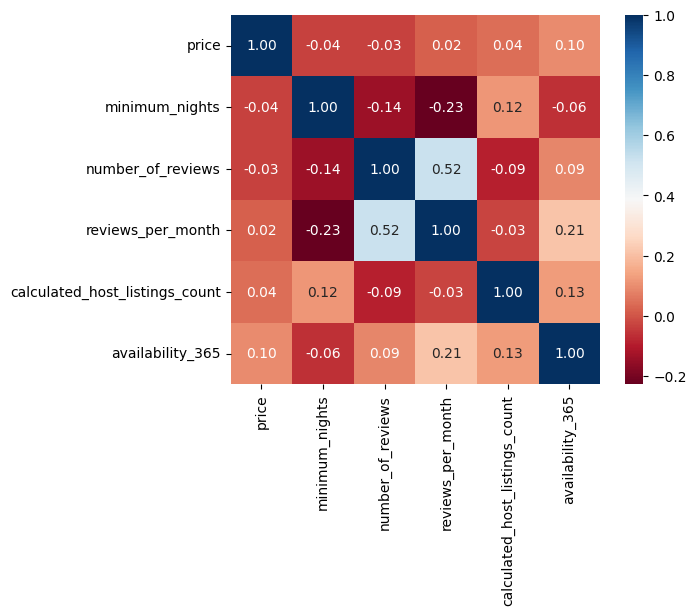

In [18]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt= '.2f', square=True, linecolor='white', annot=True);

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

A coluna da variável room_type indica o tipo de locação que está anunciada no Airbnb. Se você já alugou no site, sabe que existem opções de apartamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

Vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método value_counts().

In [19]:
# mostrar a quantidade de cada tipo de imóvel disponível
room_type = (df_clean.room_type.value_counts() / df.shape[0]) * 100
print("Porcentagem de imóveis disponiveis para locação em NY:\n", room_type)


Porcentagem de imóveis disponiveis para locação em NY:
 Entire home/apt    50.475164
Private room       38.717685
Shared room         1.301372
Hotel room          0.333492
Name: room_type, dtype: float64


<Axes: >

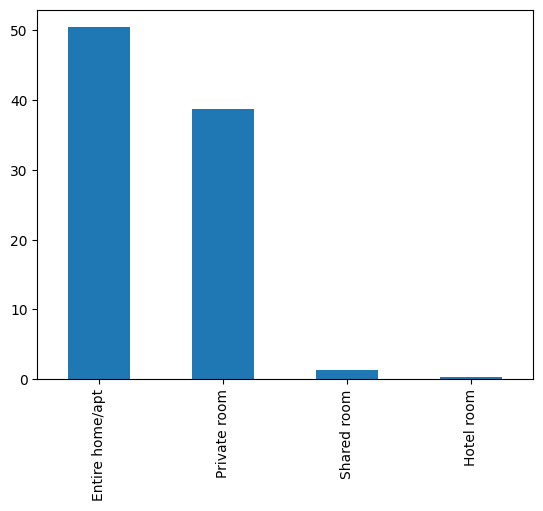

In [20]:
room_type.plot(kind='bar')

### **Q6. Qual a localidade mais cara do dataset?**

Utilizaremos a função groupby() para verificar com a média de preço se comporta em cada bairro e em cada "grupo de bairros.

In [21]:
# cria um dataframe que agrupa os datasets por "neighbourhood"
neighbourhood_qtd = df_clean.neighbourhood.value_counts()
filtro = neighbourhood_qtd[neighbourhood_qtd>=2]
neighbourhood_price = df_clean.groupby('neighbourhood').price.mean().sort_values(ascending=False)

# cria um filtro para encontrar os bairros mais caros e baratos de NY
expensive_neighbourhood = (neighbourhood_price.loc[filtro.index]).sort_values(ascending=False).head(10).index
lowcost_neighbourhood = (neighbourhood_price.loc[filtro.index]).sort_values().head(10).index
print(lowcost_neighbourhood)

# dataframes contendo apenas os 10 bairros mais baratos e caros de NY
df_expensive_neighbourhood = df_clean[df_clean['neighbourhood'].isin(expensive_neighbourhood)]
df_lowcost_neighbourhood = df_clean[df_clean['neighbourhood'].isin(lowcost_neighbourhood)]




Index(['Grant City', 'Hunts Point', 'West Brighton', 'Mariners Harbor',
       'Woodside', 'West Farms', 'Hollis', 'Schuylerville', 'Bronxdale',
       'Elmhurst'],
      dtype='object')


In [34]:
# carrega os dados de geolocalização
lowcost_latitude = df_lowcost_neighbourhood.latitude.values
lowcost_longitude = df_lowcost_neighbourhood.longitude.values
lowcost_listings = df_lowcost_neighbourhood.values

expensive_latitude = df_expensive_neighbourhood.latitude.values
expensive_longitude = df_expensive_neighbourhood.longitude.values
expensive_listings = df_expensive_neighbourhood.values

# cria um mapa de Nova York com zoom inicial de 10
nyc = folium.Map(location=[40.7267795,-73.8828923],
                 zoom_start=10)


In [35]:
# loop para marcar as localidades no mapa de NY

for lat, lon, listing in zip(lowcost_latitude, lowcost_longitude, lowcost_longitude):
    folium.Marker(location=[float(lat), float(lon)], popup=listing, icon=folium.Icon(color='green', icon='home')).add_to(nyc)

for lat, lon, listing in zip(expensive_latitude, expensive_longitude, expensive_listings):
    folium.Marker(location=[float(lat), float(lon)], popup=listing, icon=folium.Icon(color='red', icon='usd')).add_to(nyc)

nyc.save('nyc_map.html')
nyc

In [24]:
print("\nBairros mais caros de Nova York:\n", expensive_neighbourhood)
print("\nBairros mais baratos de Nova York:\n", lowcost_neighbourhood)
print("\nGrupo de bairros mais caros de Nova York\n", df_clean.groupby('neighbourhood_group').price.mean().sort_values(ascending=False))


Bairros mais caros de Nova York:
 Index(['Tribeca', 'Neponsit', 'Financial District', 'Prospect Park',
       'Theater District', 'Broad Channel', 'Belle Harbor', 'Navy Yard',
       'NoHo', 'West Village'],
      dtype='object')

Bairros mais baratos de Nova York:
 Index(['Grant City', 'Hunts Point', 'West Brighton', 'Mariners Harbor',
       'Woodside', 'West Farms', 'Hollis', 'Schuylerville', 'Bronxdale',
       'Elmhurst'],
      dtype='object')

Grupo de bairros mais caros de Nova York
 neighbourhood_group
Manhattan        177.149620
Brooklyn         134.196225
Staten Island    117.943662
Queens           114.772620
Bronx            109.486645
Name: price, dtype: float64


<Axes: xlabel='longitude', ylabel='latitude'>

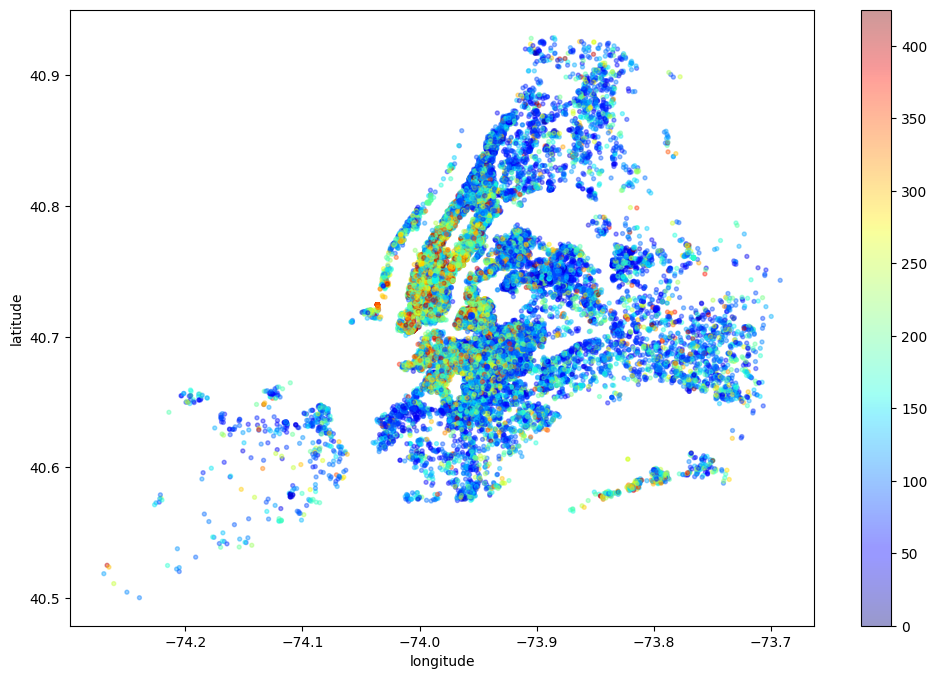

In [25]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8))

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [26]:
# ver a média da coluna `minimum_nights``
df.minimum_nights.mean()
print('A média minimas de aluguel em NY é de: {:.2f}'.format((df_clean.minimum_nights.mean())))

A média minimas de aluguel em NY é de: 16.42


## Conclusões


Após a realização da análise inicial na base de dados do Airbnb, verificou-se a existencia de Outliers em algumas variáveis. Dando-se importância nesse estudo, para duas especificas "minimum_nights" e "prices". Após a limpeza dos dados e retirada dos outliers, verifica-se que em média um Airbnb pode ser alugado na cidade de Nova York por *$157,88* em média, sendo o tempo mínimo de permanência por volta de *17 dias*

Na região de NY, os imóveis que estão disponiveis para se alugar dentro da plataforma do Airbnb en  são em sua maioria apartamentos ou casas inteiras e raramente tem-se quartos de hotéis ou quartos compartilhados.

Além disso, vemos que Manhattan é a região que contém em média os valores mais caros de aluguél $177.15.

Por fim, lembra-se que este dataset é uma versão resumida, ideal apenas para uma abordagem inicial. Recomenda-se que seja usado, em uma próxima análise exploratória, o conjunto de dados completos, com 106 atributos disponíveis.
